In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sqlite3
import datetime



## Exercise 1

In [4]:
#q1
def temp_tester(temperature):
    ## inner function has access to variables of the encapsulating method
    def check_temp(temperature_):
        if(abs(temperature_-temperature)<=1):
            return True
        return False
    return check_temp
chicken_temp = temp_tester(42)
chicken_temp(43)

True

In [5]:
human_tester = temp_tester(37)
chicken_tester = temp_tester(41.1)
# Testing the function
print(chicken_tester(42)) # True -- i.e. not a fever for a chicken
print(human_tester(42))   # False -- this would be a severe fever for a human
print(chicken_tester(43)) # False
print(human_tester(35))   # False -- too low
print(human_tester(98.6)) # False -- normal in degrees F but our reference temp was in degrees C

True
False
False
False
False


## Exercise 2

In [6]:
with sqlite3.connect("files/hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population",db)

data


,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


In [9]:
## Have a look at raw data before preprocessing
print(data.columns.values)
print(data.nunique()) ## returns number of unique values by column
print(len(data.drop_duplicates())) ## will return to us number of unique rows, though may need to process the data and strip any whitespace,etc.
data.describe() ## returns key statistics about the data

['name' 'age' 'weight' 'eyecolor']
name        137592
age         152361
weight      129749
eyecolor         3
dtype: int64
152361


,age,weight
count,152361.000000,152361.000000
mean,39.510528,60.884134
std,24.152760,18.411824
min,0.000748,3.382084
25%,19.296458,58.300135
50%,38.468955,68.000000
75%,57.623245,71.529860
max,99.991547,100.435793


### Process and clean the data

In [10]:
data_cleaned = data.copy()
data_cleaned['name'] = data_cleaned['name'].str.strip()
data_cleaned['eyecolor'] = data_cleaned['eyecolor'].str.strip()
data_cleaned['age'] = data_cleaned['age'].astype(int) ## may have records taken at for the same person at different times or maybe difference in decimal
data_cleaned['weight'] = data_cleaned['weight'].astype(int)
data_cleaned.drop_duplicates(inplace = True)

In [11]:
data_cleaned

,name,age,weight,eyecolor
0,Edna Phelps,88,67,brown
1,Cara Yasso,9,29,brown
2,Gail Rave,18,55,brown
3,Richard Adams,16,70,brown
4,Krista Slater,49,70,brown
...,...,...,...,...
152356,John Fowler,23,71,blue
152357,Diana Shuffler,21,67,brown
152358,Kevin Cuningham,87,60,brown
152359,James Libengood,21,81,brown


> for purposes of the class though I will go ahead with data instead of data_cleaned since there is no surefire way of knowing the uniqueness of records. Need to consult Dr. McDougal

<AxesSubplot:xlabel='age', ylabel='Count'>

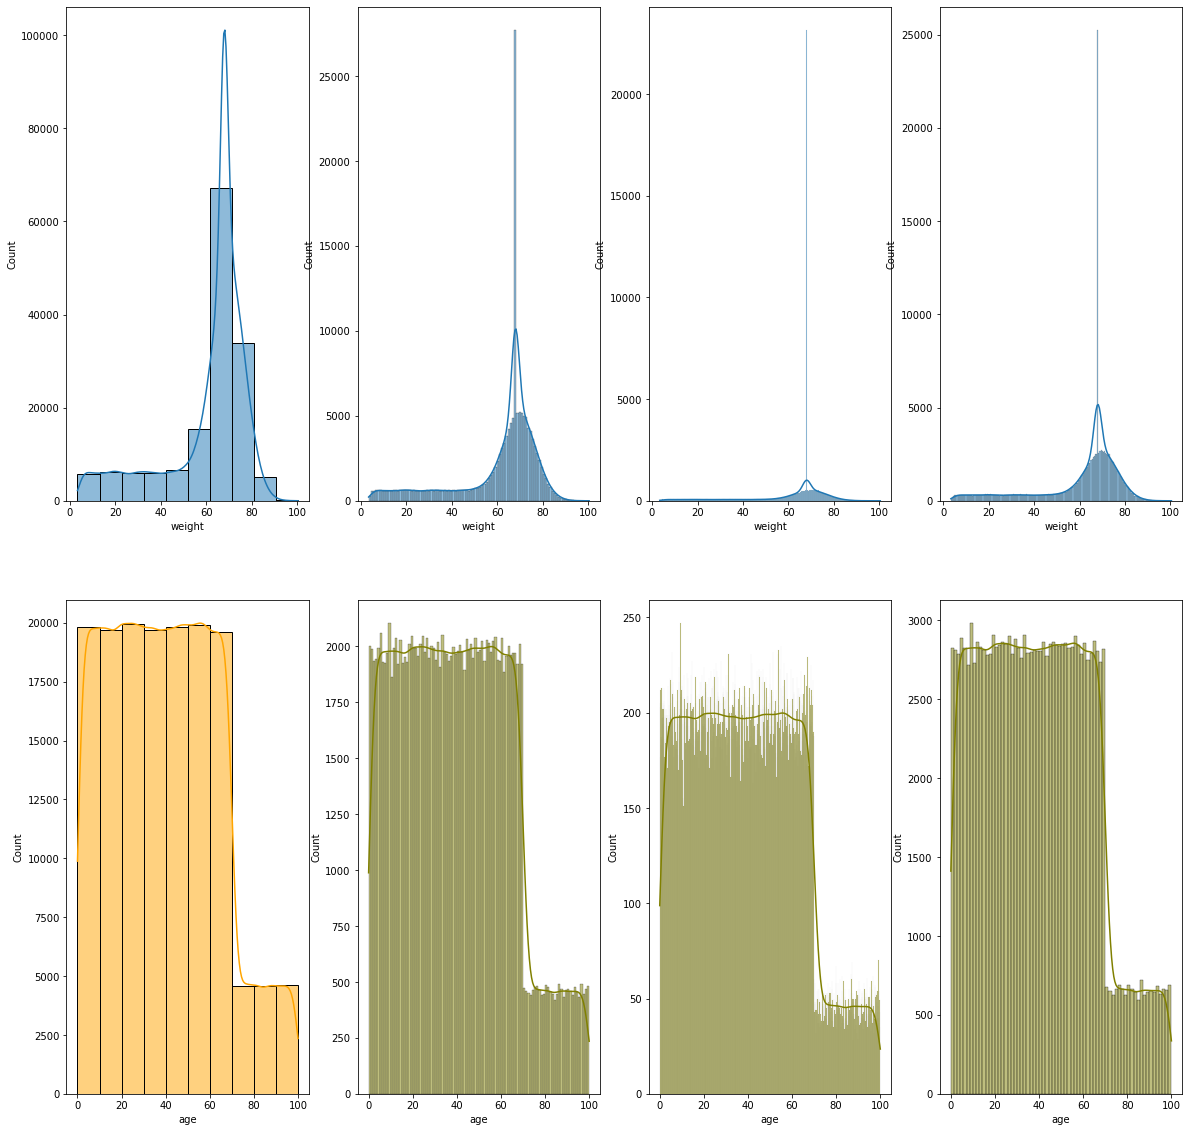

In [12]:
plot,axes = plt.subplots(2,4,figsize = (20,20))
sns.histplot(data['weight'],kde = True,bins = 10, ax=axes[0,0])
sns.histplot(data['weight'],kde = True,bins = 100, ax=axes[0,1])
sns.histplot(data['weight'],kde = True,bins = 1000, ax=axes[0,2])
sns.histplot(data['weight'],kde = True,bins = 'auto', ax=axes[0,3])

# axes[0,1].set_yscale('log')
sns.histplot(data['age'],kde = True,bins = 10,color = 'orange',ax=axes[1,0])
sns.histplot(data['age'],kde = True,bins = 100,color = 'olive',ax=axes[1,1])
sns.histplot(data['age'],kde = True,bins = 1000,color = 'olive',ax=axes[1,2])
sns.histplot(data['age'],kde = True,bins = 'auto',color = 'olive',ax=axes[1,3])
# axes[1,1].set_yscale('log')
# print(plot)
# print(plot)

In [13]:
print(len(data[data['weight'].between(60,65)]))
print(len(data[data['weight'].between(65,70)]))
print(len(data[data['weight'].between(70,75)]))

## Clearly there's an unusually high number of people in the 65 to 70 kg bracket.

16727
47905
24471


Unusually high number of people in  the 65 to 70 kg bracket. For bins I tried 10,100,1000 and auto and have plotted them all

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='weight'>

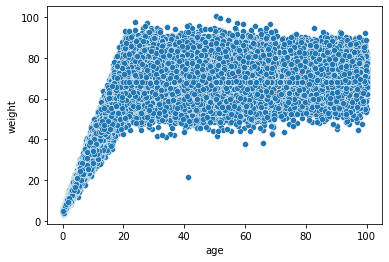

In [14]:
sns.scatterplot(data['age'],data['weight'])



In [15]:
data[(data['age'] > 20) & ((data['weight'] < 40)|(data['weight'] > 100))]
# looking for outliers, based on the graph it made sense to look at observational units where age > 20 yrs and weight was below 40 kgs or above 100 kgs.
# Anthony Freeman seems to be the answer.

,name,age,weight,eyecolor
537,Anthony Freeman,41.300000,21.700000,green
43919,Mark Harris,50.339841,100.435793,brown
122495,Courtney Nunn,65.799859,38.427617,brown
124946,Douglas Garstka,59.795013,37.637555,blue


## Exercise 3

In [16]:
# Date downloaded: September 6 2021
us_states_df = pd.read_csv('files/us-states.csv',parse_dates=[0])


In [17]:
us_states_df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
30369,2021-09-05,Virginia,51,778167,11899
30370,2021-09-05,Washington,53,577720,6749
30371,2021-09-05,West Virginia,54,197984,3124
30372,2021-09-05,Wisconsin,55,741412,8521


In [18]:

# us_states_df['new cases'] = np.nan
# for i in range(1,len(us_states_df)):
#     value_ = us_states_df.iloc[i]
#     # print(us_states_df[(us_states_df['state'] == value_.state) & (us_states_df['date'] == value_.date - np.timedelta64(1,'D'))])
    
#     # print(us_states_df[(us_states_df['state'] == value_.state) & (us_states_df['date'] == value_.date - np.timedelta64(1,'D'))].cases.values)

#     try:
#         us_states_df.at[i,'new cases'] = value_.cases - us_states_df[(us_states_df['state'] == value_.state) & (us_states_df['date'] == value_.date - np.timedelta64(1,'D'))].cases.values[0]
#     except IndexError:
#         us_states_df.at[i,'new cases'] = value_.cases

# # us_states_df

In [19]:
####### Data has cumulative cases as on a particular date. Thus I'm subtracting the count on a particular date from the cases on the prvious date.
def getNewCases(cases,state,date_):
    # print(us_states_df[(us_states_df['state'] == value_.state) & (us_states_df['date'] == value_.date - np.timedelta64(1,'D'))])
    
    # print(us_states_df[(us_states_df['state'] == value_.state) & (us_states_df['date'] == value_.date - np.timedelta64(1,'D'))].cases.values)

    try:
        return cases - us_states_df[(us_states_df['state'] == state) & (us_states_df['date'] == date_ - np.timedelta64(1,'D'))].cases.values[0]
    except IndexError:
        print(cases,state,date_)
        return cases # This happens on the first date for the particular state

In [20]:
us_states_df['new cases'] = us_states_df.apply(lambda x: getNewCases(x.cases,x.state,x.date),axis = 1)
# printing wherever the original cases were placed instead of new cases. This is typically happening on the first date for each state.

1 Washington 2020-01-21 00:00:00
1 Illinois 2020-01-24 00:00:00
1 California 2020-01-25 00:00:00
1 Arizona 2020-01-26 00:00:00
1 Massachusetts 2020-02-01 00:00:00
1 Wisconsin 2020-02-05 00:00:00
1 Texas 2020-02-12 00:00:00
10 Nebraska 2020-02-17 00:00:00
1 Utah 2020-02-25 00:00:00
1 Oregon 2020-02-28 00:00:00
2 Florida 2020-03-01 00:00:00
1 New York 2020-03-01 00:00:00
2 Rhode Island 2020-03-01 00:00:00
2 Georgia 2020-03-02 00:00:00
1 New Hampshire 2020-03-02 00:00:00
1 North Carolina 2020-03-03 00:00:00
1 New Jersey 2020-03-04 00:00:00
2 Colorado 2020-03-05 00:00:00
3 Maryland 2020-03-05 00:00:00
2 Nevada 2020-03-05 00:00:00
1 Tennessee 2020-03-05 00:00:00
1 Hawaii 2020-03-06 00:00:00
1 Indiana 2020-03-06 00:00:00
1 Kentucky 2020-03-06 00:00:00
1 Minnesota 2020-03-06 00:00:00
1 Oklahoma 2020-03-06 00:00:00
2 Pennsylvania 2020-03-06 00:00:00
2 South Carolina 2020-03-06 00:00:00
1 District of Columbia 2020-03-07 00:00:00
1 Kansas 2020-03-07 00:00:00
1 Missouri 2020-03-07 00:00:00
1 Verm

In [21]:
us_states_df



,date,state,fips,cases,deaths,new cases
0,2020-01-21,Washington,53,1,0,1
1,2020-01-22,Washington,53,1,0,0
2,2020-01-23,Washington,53,1,0,0
3,2020-01-24,Illinois,17,1,0,1
4,2020-01-24,Washington,53,1,0,0
...,...,...,...,...,...,...
30369,2021-09-05,Virginia,51,778167,11899,0
30370,2021-09-05,Washington,53,577720,6749,151
30371,2021-09-05,West Virginia,54,197984,3124,1500
30372,2021-09-05,Wisconsin,55,741412,8521,0


Methods to plot the graph

In [22]:
def SplitNum(n):
    min_ = np.inf
    minset = ()
    if(n<=3):
        return (1,n)
    for i in range(1,int(n**0.5)):
        if(n%i == 0):
            diffInFactors = abs(i - n/i)
            if(diffInFactors < min_):
                min_ = diffInFactors
                val1 = i
                val2 = int(n/i)
                factors_ = {val1,val2}
                minset = (min(factors_),max(factors_))
    return minset

def CaseGrowth(state_names = [],df = None,cases_cname = 'cases',n = 1):
    num_graphs = len(state_names)
    num_days = np.timedelta64(n,'D')
    plot_grid = SplitNum(num_graphs)
    plot,axes = plt.subplots(plot_grid[0],plot_grid[1],figsize = (plot_grid[1]*10,plot_grid[1]*5))
    i = 0
    j = 0
    if(state_names):
        
        for state_idx in range(len(state_names)):
            i = int(state_idx%plot_grid[0])
            j = int(state_idx/plot_grid[0])
            df_state = us_states_df[us_states_df.state == state_names[state_idx]]
            latest_date = df_state['date'][df_state.date == df_state.date.max()]
            latest_date = latest_date.values[0]
            start_date = latest_date - num_days
            df_plot_state = df_state[(df_state['date'] >= start_date) & (df_state['date'] <= latest_date)]
            try:
                g = sns.lineplot(x = df_plot_state['date'],y = df_plot_state[cases_cname],ax = axes[i,j])
                g.set_xlabel(state_names[state_idx])
            except IndexError:
                g = sns.lineplot(x = df_plot_state['date'],y = df_plot_state[cases_cname],ax = axes[j])
                g.set_xlabel(state_names[state_idx])
            except TypeError:
                g = sns.lineplot(x = df_plot_state['date'],y = df_plot_state[cases_cname])
                g.set_xlabel(state_names[state_idx])

def plotComparisonGraph(state_names = [],df = None,state_cname= 'state',cases_cname = 'cases',n = 1):
    plot = plt.figure(figsize=(10,10))
    df_state = df[df[state_cname].isin(state_names)]
    num_days = np.timedelta64(n,'D')
    latest_date = df['date'].max()
    start_date = latest_date - num_days
    df_state = df_state[df_state['date'].between(start_date,latest_date)]
    sns.lineplot(x = df_state['date'],y = df_state[cases_cname],hue = df_state[state_cname])

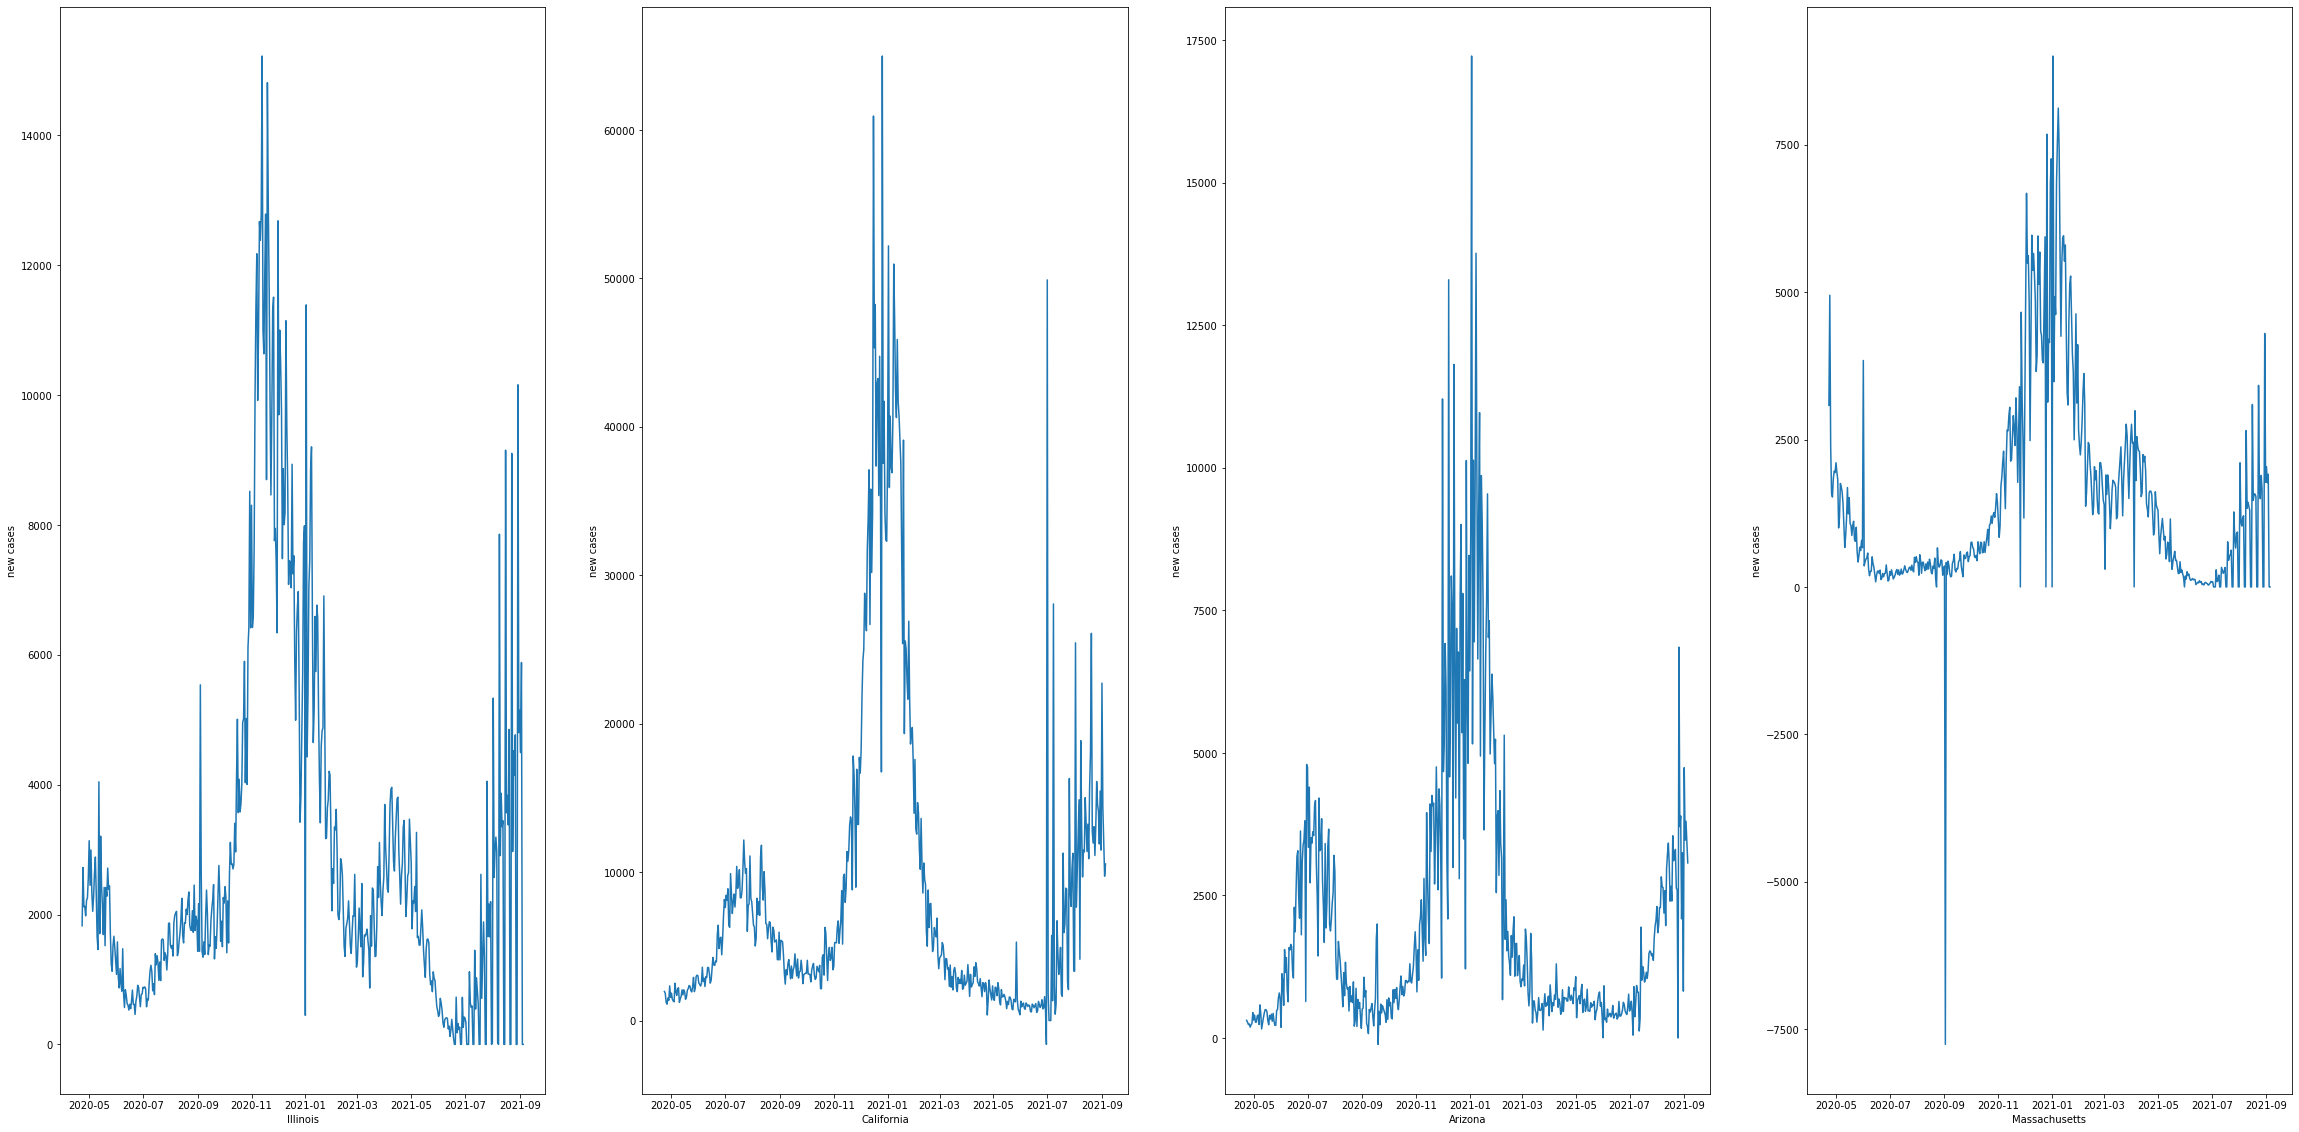

In [23]:
us_states = list(us_states_df['state'].unique())
states_to_plot = us_states[1:5]

CaseGrowth(state_names=states_to_plot,df = us_states_df,cases_cname = 'new cases',n = 500)


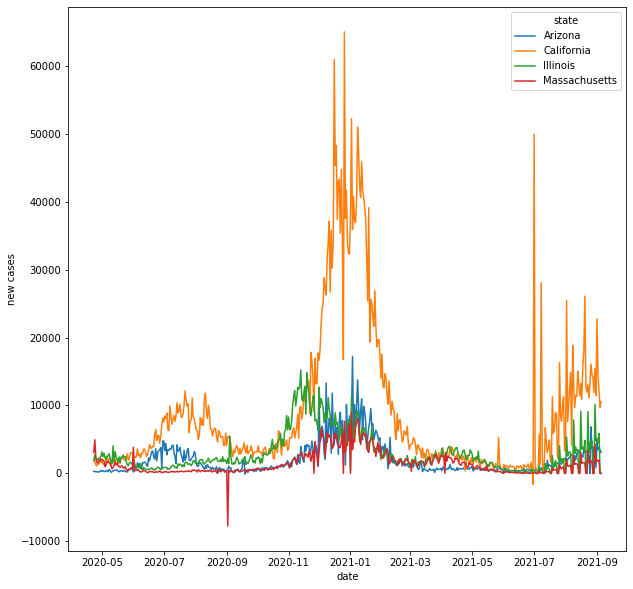

In [24]:
plotComparisonGraph(state_names=states_to_plot,df = us_states_df,cases_cname = 'new cases',n = 500)

In [25]:
# Spotted some errors in reporting numbers here
us_states_df[(us_states_df['state'] == 'Massachusetts') & (us_states_df['date'].isin(['2020-09-01','2020-09-02']))]

,date,state,fips,cases,deaths,new cases
10046,2020-09-01,Massachusetts,25,128888,9064,355
10101,2020-09-02,Massachusetts,25,121131,9060,-7757


getMaxCases and compareTwoStates methods for getting the peak of a state and comparing states respectively

In [26]:
def getMaxCases(df,state,state_cName,cases_cName,date_cName):
    maxCases = df[df[state_cName] == state][cases_cName].max()
    date_ = df[(df[state_cName] == state) & (df[cases_cName] == maxCases)][date_cName].min()
    return (state,date_,maxCases)


print(getMaxCases(us_states_df,'Arizona','state','new cases','date'))

('Arizona', Timestamp('2021-01-03 00:00:00'), 17222)


In [27]:
# us_states_df[us_states_df['state'] == 'Arizona']
# date_vals = getMaxCases(us_states_df,'Arizona','state','cases','date')
# date_vals_2 = getMaxCases(us_states_df,'Washington','state','cases','date')


In [28]:
# method to compare two states
def compareTwoStates(df,state_1,state_2,state_cName,cases_cName,date_cName):
    state_1_values = getMaxCases(df,state_1,state_cName,cases_cName,date_cName)
    state_2_values = getMaxCases(df,state_2,state_cName,cases_cName,date_cName)
    numDays = abs(state_1_values[1] - state_2_values[1])
    print(state_1_values,state_2_values)
    min_value = min(state_1_values[1],state_2_values[1])
    if min_value < state_2_values[1]:
        return state_1_values,numDays
    else:
        return state_2_values,numDays

compareTwoStates(us_states_df,'Connecticut','Washington','state','new cases','date')

    


('Connecticut', Timestamp('2020-12-28 00:00:00'), 8457) ('Washington', Timestamp('2021-08-30 00:00:00'), 8346)


(('Connecticut', Timestamp('2020-12-28 00:00:00'), 8457),
 Timedelta('245 days 00:00:00'))

In [29]:
us_states_df[us_states_df['state'] == 'Connecticut']

,date,state,fips,cases,deaths,new cases
386,2020-03-08,Connecticut,9,1,0,1
421,2020-03-09,Connecticut,9,2,0,1
458,2020-03-10,Connecticut,9,2,0,0
498,2020-03-11,Connecticut,9,3,0,1
544,2020-03-12,Connecticut,9,6,0,3
...,...,...,...,...,...,...
30105,2021-09-01,Connecticut,9,373784,8358,712
30160,2021-09-02,Connecticut,9,374470,8394,686
30215,2021-09-03,Connecticut,9,375135,8394,665
30270,2021-09-04,Connecticut,9,375135,8394,0


## Exercise 4

In [30]:
def getDrugUserDistribution(n,d):
    lst = [0]*(n-d) + [1]*d
    np.random.shuffle(lst)
    return lst


In [38]:
def model_responses(lst,s):
    # protocol: 
    # Step 1: take first decision based on a coin flip
    # Step 2: if step 1 yields True, flip coin and return val
    # Step 3: if step1 yields false return true status
    # E[yes] = 0.25 + 0.5p
    lst_pred = np.zeros(s) # list to store predictions
    lst_smpl = np.random.choice(lst,s) # list which gets sample from population
    # print(lst_smpl)
    for i in range(len(lst_smpl)):
        s1 = np.random.choice([True,False])
        if(s1):
            s2 = np.random.choice([0,1])
            lst_pred[i] = s2
        else:
            lst_pred[i] = lst_smpl[i]
    
    return lst_pred.astype(int),lst_smpl # returning both the sample drawn from population and the predictions based on coin flips




In [39]:
lst = getDrugUserDistribution(10,3)
print(lst)
predicted_vals = model_responses(lst,5)
predicted_vals[0]

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1]


array([0, 0, 1, 1, 0])

In [1]:
# 4c
def getDrugUsers(pop,d,s):
    lst = getDrugUserDistribution(pop,d)
    lst_pred,lst_smpl = model_responses(lst,s)
    # print(lst)
    # print(lst_smpl)
    # print(lst_pred)
    e_yes = np.sum(lst_pred)/len(lst_pred)
    # print(np.sum(lst_pred),len(lst_pred))
    p = (e_yes - 0.25)/0.5 # investigate if p goes below 0
    if(p<0):
        p = 0
        # print("e_yes",e_yes)
    return p # p is proportion of drug users in population as predicted by our model



In [40]:
# E[yes] = 0.25 + 0.5p
# if e_yes falls below 0.25 p goes negative
# p is proportion of users in the entire population, while e is an expectation based on a smaller sample.
# probably p needs to be multiplied to the 0.25 

getDrugUsers(10,3,5)


0.7

<li> E[yes] = 0.25 + 0.5p </li>
<li> if e_yes falls below 0.25, p goes negative </li>
<li> p is proportion of users in the entire population, while e is an expectation based on a smaller sample. </li>
<li> we've assumed the coins to be fair and the expectation is for a sample while p is generated for the entire population </li>
<li> Since E has a constant value of 0.25 associated the p goes below 0, this will tend to happen more frequently for smaller sample sizes </li>


In [54]:
#4d
# Running for 1000 pop, with 100 drug users and sample size of 50
p = getDrugUsers(1000,100,50)
print(int(1000*p)) # taking just int 

99


<AxesSubplot:ylabel='Count'>

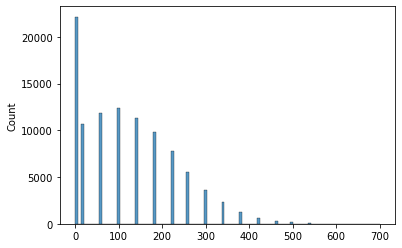

In [67]:
lst = [1000* getDrugUsers(1000,100,50) for i in range(100000)]
sns.histplot(lst)
# did the experiment 100000 times
# values in the neighbourhood of 0 very high probably since all -ve values for p being capped to 0, Second peak is at 100 which is roughly 10%

<AxesSubplot:ylabel='Count'>

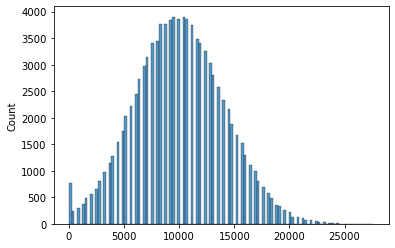

In [70]:
# 4f
lst2 = [100000*getDrugUsers(100000,10000,500) for i in range(100000)]
sns.histplot(lst2)

In [ ]:
# This worked out much better! Maybe the small sample size was causing issues.

<AxesSubplot:ylabel='Count'>

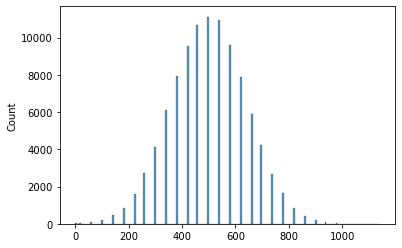

In [72]:
# 4g
lst3 = [1000*getDrugUsers(1000,500,50) for i in range(100000)]
sns.histplot(lst3)